# Segunda Avaliação Parcial

Neste módulo trabalhamos a visualização de dados, assim como as técnicas para acessar estes dados da internet. As técnicas de web scraping que estudamos, usando __Requests__, __Beautiful Soup__ e __Selenium__, permitem implementar aplicações que processam informação diretamente da rede.  

Desde a Instrução prática 7, por exemplo, estamos trabalhando com dados que baixamos do [Instituto Nacional de Meteorologia](https://portal.inmet.gov.br/dadoshistoricos).  

Aprendemos também como implementar uma aplicação com GUI utilizando o __TK Inter__. 

Neste contexto vamos implementar uma aplicação que, a traves de uma GUI, permita gerar gráficos de precipitações e temperaturas medias mensais de um determinado ano, para uma estação meteorológica. A atividade deve ser organizada da seguinte forma.

## Exercício 1

__Primeiro protótipo__: Desenvolva uma interface gráfica que pegue, em tempo real, as informações sobre os dados de quais anos estão disponíveis no site do [Instituto Nacional de Meteorologia](https://portal.inmet.gov.br/dadoshistoricos). Os anos disponíveis devem ser apresentados utilizando um widget apropriado que permita selecionar um, e apenas um ano. Se não tiver conexão a Internet ou se o site não estiver disponível o aplicativo deve mostrar uma mensagem de erro na interface.


```python
def obter_dados():
  # URL do site
  link = "https://portal.inmet.gov.br/dadoshistoricos"
   
  # Configuração do cabeçalho da requisição
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
   
  # Fazendo a requisição HTTP
  requisicao = requests.get(link, headers=headers)
   
  # Verificando se a requisição foi bem sucedida
  if requisicao.status_code == 200:
    # Parseando o conteúdo HTML da página
    site = BeautifulSoup(requisicao.text, 'html.parser')
  else:
    # Exibindo mensagem de erro em caso de falha na requisição
    messagebox.showerror("Erro", "Erro na requisição")
    return None

  # Obtendo os anos e os links das postagens do site
  anos = site.find_all('article', class_='post-preview')
  ano = []
  link = []
  for i in anos:
    ano.append(i.find('a').string)
    link.append(i.find('a')['href'])
  return ano, link

def mostrar_erro():
  messagebox.showerror("Erro", "Erro na conexão com o site. Verifique sua conexão com a internet.")

def main():
  # Criando a janela principal da interface gráfica
  root = tk.Tk()
  root.title('Dados Meteorológicos')
  root.geometry("400x200")

  # Obtendo os dados do site
  dados_site = obter_dados()

  if dados_site:
    ano, link = dados_site

    # Criando a label e a combobox para selecionar o ano
    label_ano = tk.Label(root, text='Selecione o Ano:', font=('Arial', 15))
    label_ano.pack()

    var_ano = tk.StringVar()
    combobox_ano = ttk.Combobox(root, textvariable=var_ano, values=ano, font=('Arial', 15))
    combobox_ano.pack()

  else:
    mostrar_erro()

  # Configurando o estilo dos botões
  style = ttk.Style()
  style.configure('TButton', font=('Arial', 15))

  # Iniciando o loop principal da interface gráfica
  root.mainloop()

if __name__ == "__main__":
  main()

```

#### Obtenção de Dados do Site:

- A função obter_dados usa a biblioteca requests para acessar um site meteorológico.
- Se a conexão for bem-sucedida, ela extrai os anos e os links das postagens no site.
- Exibição na Interface Gráfica:

- A função main cria uma janela gráfica usando Tkinter e exibe uma caixa de seleção com os anos obtidos do site.
- Se a conexão falhar, uma mensagem de erro é exibida.
- Componentes Gráficos Tkinter:

- Usa tk.Label para exibir texto.
- Usa ttk.Combobox para criar uma caixa de seleção dos anos.
- Condição de Execução:

- Verifica se o script está sendo executado diretamente, e, nesse caso, inicia a interface gráfica.

## Exercício 2

__Segundo protótipo__: Com base no ano escolhido sua aplicação deve baixar o arquivo compactado, com os dados de todas as estações, descompactar ele numa pasta temporária e mostrar em um outro widget a lista de estações disponíveis para selecionar uma e apenas uma delas. O widget do protótipo anterior deve ficar disponível para que o usuário possa trocar o ano se desejar. Nesse caso um novo arquivo será baixado e descompactado e as estações disponíveis exibidas para seleção.

```python
def obter_estacoes(ano_selecionado):
  # Formatando o nome do arquivo
  nome_arquivo = ano_selecionado.replace(' ', '_').replace('(', '').replace(')', '')

  # Construindo o link para download do arquivo zip
  link = f"https://portal.inmet.gov.br/uploads/dadoshistoricos/{ano_selecionado}.zip"

  # Cria um diretório temporário para armazenar o arquivo zip
  temp_dir = 'temp_zip_folder'
  os.makedirs(temp_dir, exist_ok=True)
  print(f'Diretório temporário criado em: {temp_dir}')

  # Define o caminho completo para o arquivo zip
  zip_file_path = os.path.join(temp_dir, f'{nome_arquivo}.zip')

  # Tenta baixar o arquivo zip
  try:
    with requests.get(link, stream=True) as response:
      response.raise_for_status()
      with open(zip_file_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
          if chunk:
            file.write(chunk)

    # Tenta descompactar o arquivo zip
    try:
      with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Cria um subdiretório se o ano for maior que 2019
        if int(ano_selecionado) > 2019:
          temp_dir = os.path.join(temp_dir, ano_selecionado)
          os.makedirs(temp_dir, exist_ok=True)
        zip_ref.extractall(temp_dir)

        # Retorna a lista de estações disponíveis
        if int(ano_selecionado) <= 2019:
          estacoes = os.path.join(temp_dir, ano_selecionado)
          estacoes = os.listdir(estacoes)
        else:
          estacoes = os.listdir(temp_dir)
        return estacoes
    except zipfile.BadZipFile:
      messagebox.showerror("Erro", f"Erro: O arquivo baixado para o ano {ano_selecionado} não é um arquivo zip válido.")
      return None
  except requests.exceptions.RequestException as e:
    messagebox.showerror("Erro", f"Erro na requisição: {e}")
    return None
```

- Obtenção de Estações para um Ano Específico:

- A função obter_estacoes recebe um ano como entrada.
- Formata o nome do arquivo removendo espaços e parênteses.
- Constrói o link para download do arquivo zip usando o ano fornecido.
- Cria um diretório temporário para armazenar o arquivo zip.
- Download e Descompactação do Arquivo Zip:

- Tenta baixar o arquivo zip do link especificado.
- Se o download for bem-sucedido, tenta descompactar o arquivo zip.
- Se o ano for maior que 2019, cria um subdiretório com o ano no diretório temporário antes de extrair.
- Retorna a lista de estações disponíveis.
- Tratamento de Erros:

- Se ocorrerem erros durante o download ou a descompactação, exibe mensagens de erro usando a biblioteca messagebox.

# Exercício 3

__Terceiro protótipo__: Com base na estação selecionada gere e exiba dentro da aplicação os gráficos de precipitações e temperaturas medias mensais para a estação selecionada. A interface deve permitir que o usuário troque a estação selecionada a qualquer momento, assim como foi feito co o ano, gerando novos gráficos.   

```python
# Função para gerar gráficos
def gerar_graficos(ano_selecionado, estacao_selecionada, janela):
    dados_estacao = obter_dados_estacao(ano_selecionado, estacao_selecionada)
    dados_estacao['DATA (YYYY-MM-DD)'] = pd.to_datetime(dados_estacao['DATA (YYYY-MM-DD)'])
    dados_estacao['month'] = dados_estacao['DATA (YYYY-MM-DD)'].dt.month

    fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 6), dpi=100)

    index = pd.DatetimeIndex(dados_estacao.iloc[:, 0], name='Data')
    dados_estacao.drop(columns=dados_estacao.columns[0], axis=1, inplace=True)
    dados_estacao.set_index(index, inplace=True)

    dados_estacao['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'] = dados_estacao['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].apply(
        lambda x: None if x < -14 else x)
    temp = dados_estacao.groupby(dados_estacao['month'])['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].mean()
    temp.plot(ax=ax, title="Temperatura Média Mensal", ylabel="Temperatura (°C)", color='blue')
    ax.set_xlabel("Mês", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(["Temperatura Média"], loc="upper right")

    dados_estacao['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados_estacao['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].apply(
        lambda x: None if x < 0 else x)
    prec = dados_estacao.groupby(dados_estacao['month'])['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum()
    prec.plot(ax=ax2, title="Precipitação Mensal", ylabel="Precipitação (mm)", color='green')
    ax2.set_xlabel("Mês", fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(["Precipitação"], loc="upper right")

    fig.subplots_adjust(wspace=0.5, hspace=0.5)

    canvas = FigureCanvasTkAgg(fig, master=janela)
    canvas.get_tk_widget().pack()

def main():
    root = tk.Tk()
    root.title('Dados Meteorológicos')
    root.geometry("800x600")

    dados_site = obter_dados()

    if dados_site:
        ano, link = dados_site

        label_ano = tk.Label(root, text='Selecione o Ano:', font=('Arial', 15))
        label_ano.pack()

        var_ano = tk.StringVar()
        combobox_ano = ttk.Combobox(root, textvariable=var_ano, values=ano, font=('Arial', 15))
        combobox_ano.pack()

        def obter_estacoes_selecionar_ano():
            ano_selecionado = var_ano.get()
            if ano_selecionado:
                estacoes = obter_estacoes(ano_selecionado[4:8])
                if estacoes:
                    var_estacoes.set('')
                    combobox_estacoes['values'] = estacoes
                else:
                    mostrar_erro()

        botao_obter_estacoes = ttk.Button(root, text='Obter Estações', command=obter_estacoes_selecionar_ano, style='TButton')
        botao_obter_estacoes.pack()

        label_estacoes = tk.Label(root, text='Selecione a Estação:', font=('Arial', 15))
        label_estacoes.pack()

        var_estacoes = tk.StringVar()
        combobox_estacoes = ttk.Combobox(root, textvariable=var_estacoes, font=('Arial', 15))
        combobox_estacoes.pack()

        def gerar_graficos_estacao():
            ano_selecionado = var_ano.get()
            estacao_selecionada = var_estacoes.get()
            if ano_selecionado and estacao_selecionada:
                nova_janela = tk.Toplevel(root)
                nova_janela.title(f'Gráficos - {estacao_selecionada}')
                gerar_graficos(ano_selecionado, estacao_selecionada, nova_janela)
            else:
                messagebox.showerror("Erro", "Selecione ano e estação antes de gerar os gráficos.")

        botao_gerar_graficos = ttk.Button(root, text='Gerar Gráficos', command=gerar_graficos_estacao, style='TButton')
        botao_gerar_graficos.pack()

    else:
        mostrar_erro()

    style = ttk.Style()
    style.configure('TButton', font=('Arial', 15))

    root.mainloop()

if __name__ == "__main__":
    main()


```

-  A função gerar_graficos é responsável por criar gráficos de temperatura média mensal e precipitação mensal para uma estação meteorológica em um ano específico. Aqui está uma explicação simples e objetiva do código:

- dados_estacao = obter_dados_estacao(ano_selecionado, estacao_selecionada): Obtém os dados da estação meteorológica para o ano e estação selecionados.

- dados_estacao['DATA (YYYY-MM-DD)'] = pd.to_datetime(dados_estacao['DATA (YYYY-MM-DD)']): Converte a coluna de datas para o formato datetime.

- dados_estacao['month'] = dados_estacao['DATA (YYYY-MM-DD)'].dt.month: Cria uma nova coluna 'month' que representa o mês correspondente às datas.

- fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 6), dpi=100): Cria uma figura com dois subplots, um para temperatura média e outro para precipitação, configurando tamanho e resolução.

- index = pd.DatetimeIndex(dados_estacao.iloc[:, 0], name='Data'): Cria um índice de datas para os dados.

- dados_estacao.drop(columns=dados_estacao.columns[0], axis=1, inplace=True): Remove a primeira coluna dos dados (que é a coluna de datas original).

- dados_estacao.set_index(index, inplace=True): Define o novo índice para os dados.

- Configuração e plotagem do gráfico de temperatura média:

- a. temp.plot(ax=ax, title="Temperatura Média Mensal", ylabel="Temperatura (°C)", color='blue'): Plota a média mensal de temperatura no primeiro subplot.

- b. Configurações adicionais do subplot como rótulos e estilo.

- Configuração e plotagem do gráfico de precipitação:

- a. prec.plot(ax=ax2, title="Precipitação Mensal", ylabel="Precipitação (mm)", color='green'): Plota a soma mensal de precipitação no segundo subplot.

- b. Configurações adicionais do subplot como rótulos e estilo.

- fig.subplots_adjust(wspace=0.5, hspace=0.5): Ajusta o espaçamento entre os subplots.

- canvas = FigureCanvasTkAgg(fig, master=janela): Cria um objeto de canvas para incorporar a figura na interface gráfica.

- canvas.get_tk_widget().pack(): Exibe o canvas na janela da interface gráfica.

- Essa função é chamada quando o usuário seleciona um ano e uma estação, clicando no botão "Gerar Gráficos" na interface principal. Os gráficos são exibidos em uma nova janela, conforme especificado pelo argumento janela passado para a função.

## Respostas

Implemente sua aplicação como um pacote __Python__ e disponibilize neste __Notebook__ um explicação dos principais pontos da implementação. Utilize o comando mágico ``%run`` para executar o aplicativo desenvolvido.  Envie o __Notebook__ via __Moodle__ assim como o repositório com a implementação do aplicativo até o final do prazo. 

Diretório temporário criado em: temp_zip_folder
INMET_CO_MS_A703_PONTA PORA_01-01-2004_A_31-12-2004.CSV
temp_zip_folder/2004/INMET_CO_MS_A703_PONTA PORA_01-01-2004_A_31-12-2004.CSV
Dados carregados:
  DATA (YYYY-MM-DD) HORA (UTC)  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
0        2004-01-01      00:00                             -9999   
1        2004-01-01      01:00                             -9999   
2        2004-01-01      02:00                             -9999   
3        2004-01-01      03:00                             -9999   
4        2004-01-01      04:00                             -9999   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                              -9999       
1                                              -9999       
2                                              -9999       
3                                              -9999       
4                                              -9999       

   PRESSÃO ATMOSFERICA MAX.NA H

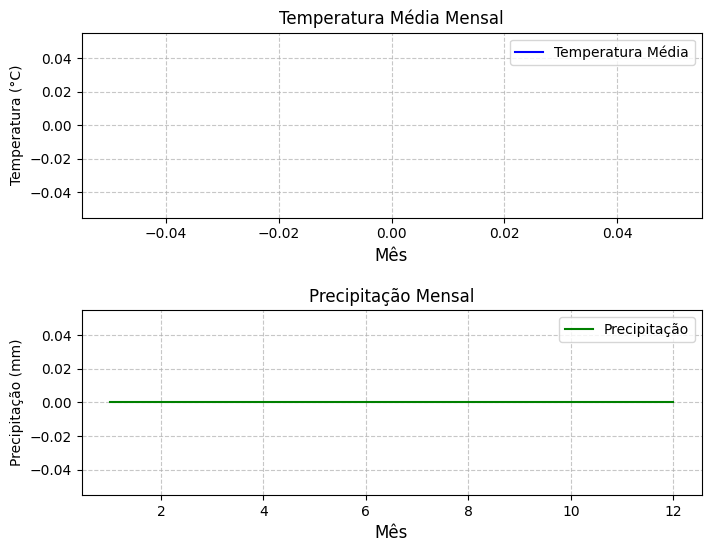

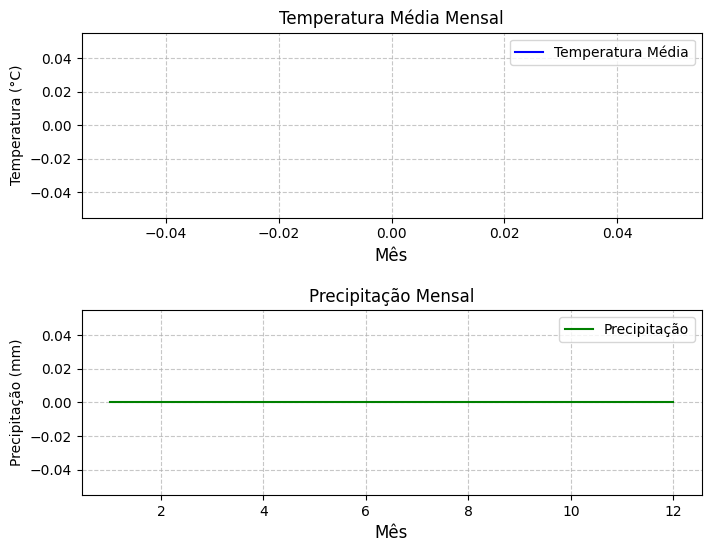

In [1]:
%run meteorologico/__main__.py
